In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv("train.csv")

In [3]:
data.head()# read first five rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [5]:
# Checking for the null values
(data.isnull().sum() / len(data)).sort_values(ascending=False)[:8]

price_range    0.0
n_cores        0.0
blue           0.0
clock_speed    0.0
dual_sim       0.0
fc             0.0
four_g         0.0
int_memory     0.0
dtype: float64

In [6]:
print(data['price_range'].nunique())

4


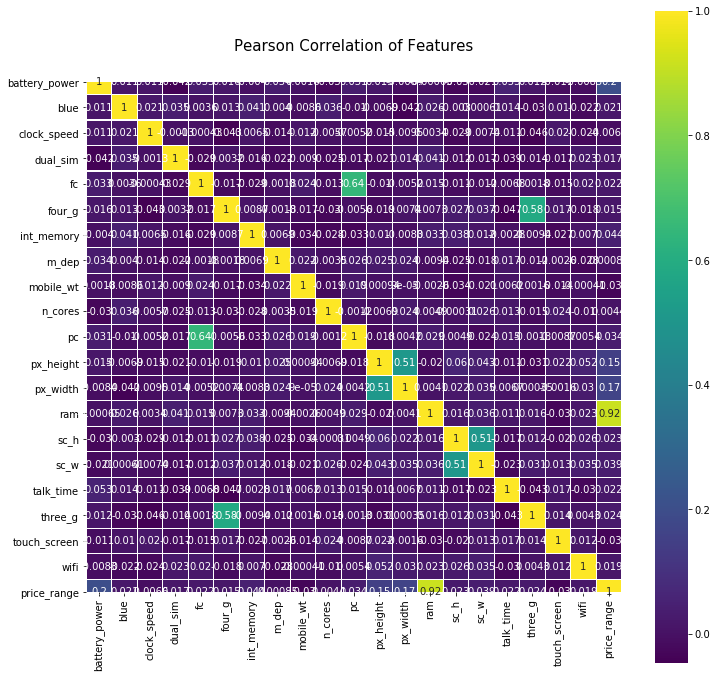

In [7]:
# heatmap to check if there is any correlation present in the data.
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
# To check the column type and count of the variables.
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,19
1,float64,2


In [9]:
dtype_df.loc[:21,:]

,Count,Column Type
0,battery_power,int64
1,blue,int64
2,clock_speed,float64
3,dual_sim,int64
4,fc,int64
5,four_g,int64
6,int_memory,int64
7,m_dep,float64
8,mobile_wt,int64
9,n_cores,int64


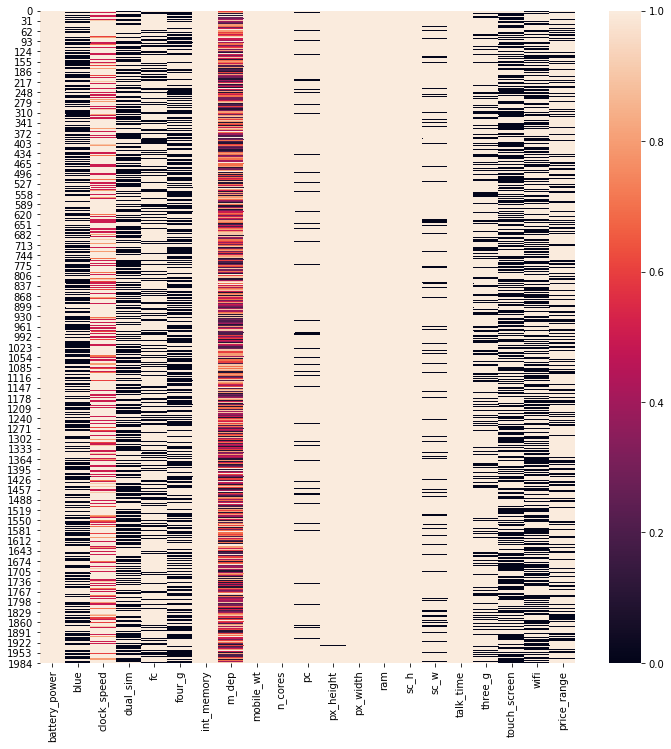

In [10]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(data, vmin=0, vmax=1)

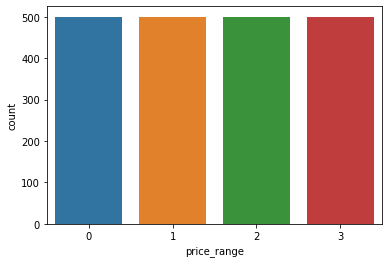

In [11]:
import seaborn as sns
sns.countplot(data['price_range'],label="Count")

In [12]:
X = data.drop('price_range', axis = 1)
y = data.price_range

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as statmodel

In [15]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [16]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe

print(featureScores.nlargest(20,'Score')) #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


c:\users\lionheart7dec\anaconda3\envs\mytfenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05848683 0.0183772  0.03356829 0.02143939 0.03100629 0.01444246
 0.03362582 0.03137581 0.03452723 0.03372948 0.03547602 0.04678711
 0.04845657 0.41175751 0.03270287 0.03426323 0.0304895  0.01220704
 0.01757657 0.01970476]


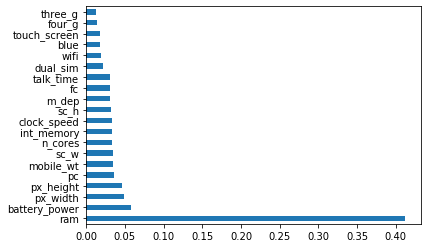

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

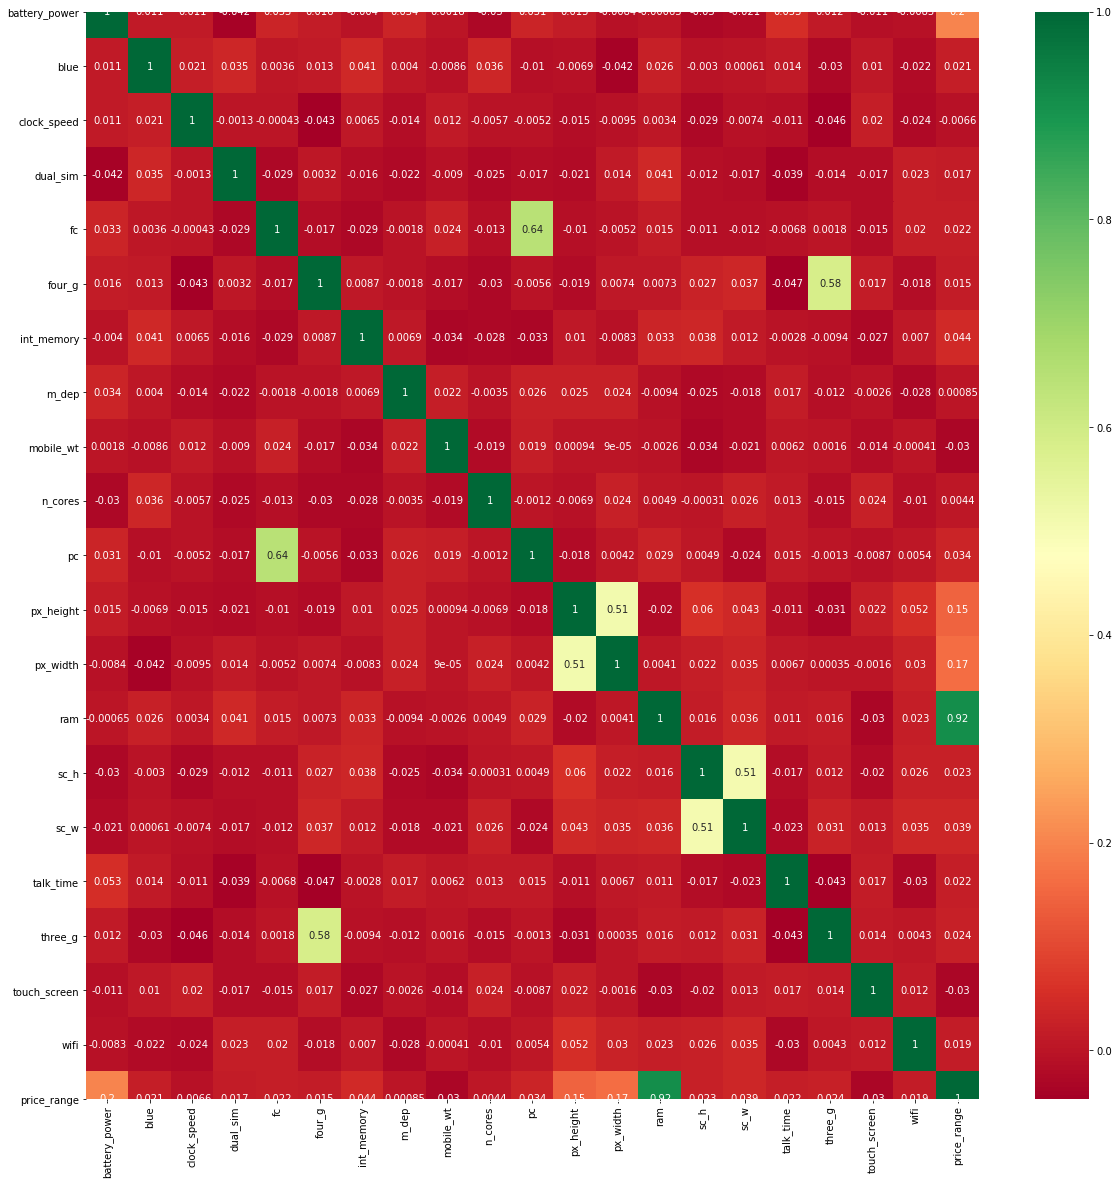

In [18]:
#get correlations of each features in dataset
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
X.describe().T.shape

(20, 8)

In [20]:
data.shape

(2000, 21)

Text(0, 0.5, 'Data type')

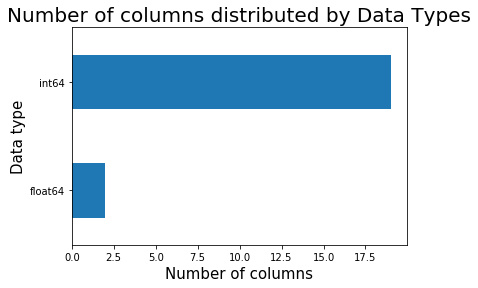

In [21]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [22]:
print(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

Series([], dtype: float64)


In [23]:
numeric_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

In [24]:
numeric_var_names

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [25]:
feature_name = list(X_train.columns)
num_feats=15

In [26]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 20 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [27]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


In [28]:
rfe_feature

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [29]:
X = data.loc[:,['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','pc','n_cores']]
y = data['price_range']

In [30]:

X.shape,y.shape

((2000, 12), (2000,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1',C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.877
Test set score: 0.872


In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,
y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,
y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.764


In [34]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.8968286  0.04234231 0.06082909 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [35]:

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Feature Importances (%)')

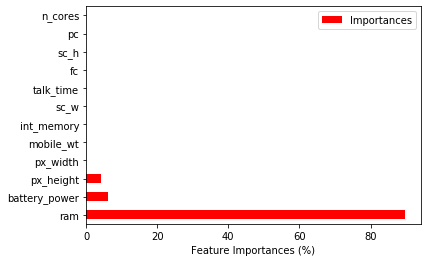

In [36]:
# feature importance

pd.DataFrame(data = tree.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3,n_estimators=100,criterion='gini', random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train,
y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test,
y_test)))

Accuracy on training set: 0.849
Accuracy on test set: 0.820


In [41]:
print("Feature importances:\n{}".format(rf.feature_importances_))

Feature importances:
[0.70594565 0.0503743  0.08057399 0.07124126 0.01491567 0.01959072
 0.01122353 0.01290902 0.00656698 0.00799694 0.0047297  0.01393223]


Text(0.5, 0, 'Feature Importances (%)')

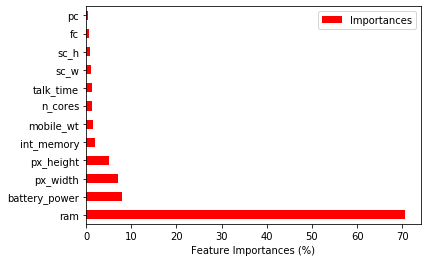

In [42]:
pd.DataFrame(data = rf.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate=0.01)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.800


Text(0.5, 0, 'Feature Importances (%)')

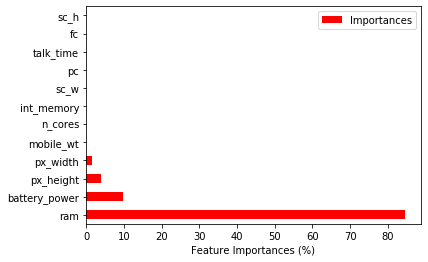

In [44]:
pd.DataFrame(data = gb.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [46]:
from sklearn.svm import SVC
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.95


In [47]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.96
